In [1]:
import pandas as pd

        
  import pandas as pd


In [2]:
df=pd.read_csv('CarPricesPrediction.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Make        1000 non-null   object 
 2   Model       1000 non-null   object 
 3   Year        1000 non-null   int64  
 4   Mileage     1000 non-null   int64  
 5   Condition   1000 non-null   object 
 6   Price       1000 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,Chevrolet,Civic,2016,46054,Good,23697.30
3,Ford,Civic,2022,34981,Excellent,18251.05
4,Chevrolet,Civic,2019,63565,Excellent,19821.85
...,...,...,...,...,...,...
995,Nissan,Camry,2010,149032,Excellent,24548.50
996,Chevrolet,F-150,2014,20608,Excellent,26969.70
997,Ford,Altima,2016,109851,Good,20507.55
998,Toyota,Silverado,2010,11704,Good,31414.90


In [4]:
print(df.nunique())
print('-----')
print(df.isnull().sum())

Make           5
Model          5
Year          13
Mileage      993
Condition      3
Price        997
dtype: int64
-----
Make         0
Model        0
Year         0
Mileage      0
Condition    0
Price        0
dtype: int64


In [5]:
import sklearn
from sklearn.preprocessing import LabelEncoder

to_list=['Make', 'Model', 'Condition']

lab_enc=LabelEncoder()

for col in to_list:
    df[col]=lab_enc.fit_transform(df[col])

print(df)

     Make  Model  Year  Mileage  Condition     Price
0       1      4  2022    18107          0  19094.75
1       4      4  2014    13578          0  27321.10
2       0      2  2016    46054          2  23697.30
3       1      2  2022    34981          0  18251.05
4       0      2  2019    63565          0  19821.85
..    ...    ...   ...      ...        ...       ...
995     3      1  2010   149032          0  24548.50
996     0      3  2014    20608          0  26969.70
997     1      0  2016   109851          2  20507.55
998     4      4  2010    11704          2  31414.90
999     3      4  2017   128390          0  18580.60

[1000 rows x 6 columns]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       1000 non-null   int32  
 1   Model      1000 non-null   int32  
 2   Year       1000 non-null   int64  
 3   Mileage    1000 non-null   int64  
 4   Condition  1000 non-null   int32  
 5   Price      1000 non-null   float64
dtypes: float64(1), int32(3), int64(2)
memory usage: 35.3 KB


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_norm=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_norm)

     Make  Model      Year   Mileage  Condition     Price
0    0.25   1.00  1.000000  0.057460        0.0  0.344739
1    1.00   1.00  0.333333  0.025044        0.0  0.782267
2    0.00   0.50  0.500000  0.257488        1.0  0.589531
3    0.25   0.50  1.000000  0.178234        0.0  0.299866
4    0.00   0.50  0.750000  0.382822        0.0  0.383411
..    ...    ...       ...       ...        ...       ...
995  0.75   0.25  0.000000  0.994546        0.0  0.634803
996  0.00   0.75  0.333333  0.075361        0.0  0.763577
997  0.25   0.00  0.500000  0.714111        1.0  0.419880
998  1.00   1.00  0.000000  0.011631        1.0  1.000000
999  0.75   1.00  0.583333  0.846802        0.0  0.317393

[1000 rows x 6 columns]


In [8]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       1000 non-null   float64
 1   Model      1000 non-null   float64
 2   Year       1000 non-null   float64
 3   Mileage    1000 non-null   float64
 4   Condition  1000 non-null   float64
 5   Price      1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


In [11]:
X=df_norm.drop('Price', axis=1)
y=df_norm['Price']

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
import numpy as np

models=[('Linear Reg', LinearRegression()),
       ('Pol Reg', make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())),
       ('Rand For Reg', RandomForestRegressor())]

scoring={'r2':'r2', 'mae': 'neg_mean_absolute_error', 'mse':'neg_mean_squared_error'}

result={'Model':[], 'R^2':[], 'MAE':[], 'MSE':[]}

for na,model in models:
    cv_results=cross_validate(model, X, y, cv=5, scoring=scoring)

    r2_scores=cv_results['test_r2']
    mae_scores= -cv_results['test_mae']
    mse_scores= -cv_results['test_mse']

    avg_r2=np.mean(r2_scores)
    avg_mae=np.mean(mae_scores)
    avg_mse=np.mean(mse_scores)

    result['Model'].append(na)
    result['R^2'].append(avg_r2)
    result['MAE'].append(avg_mae)
    result['MSE'].append(avg_mse)

result_df=pd.DataFrame(result)


Text(0.5, 1.0, 'MSE')

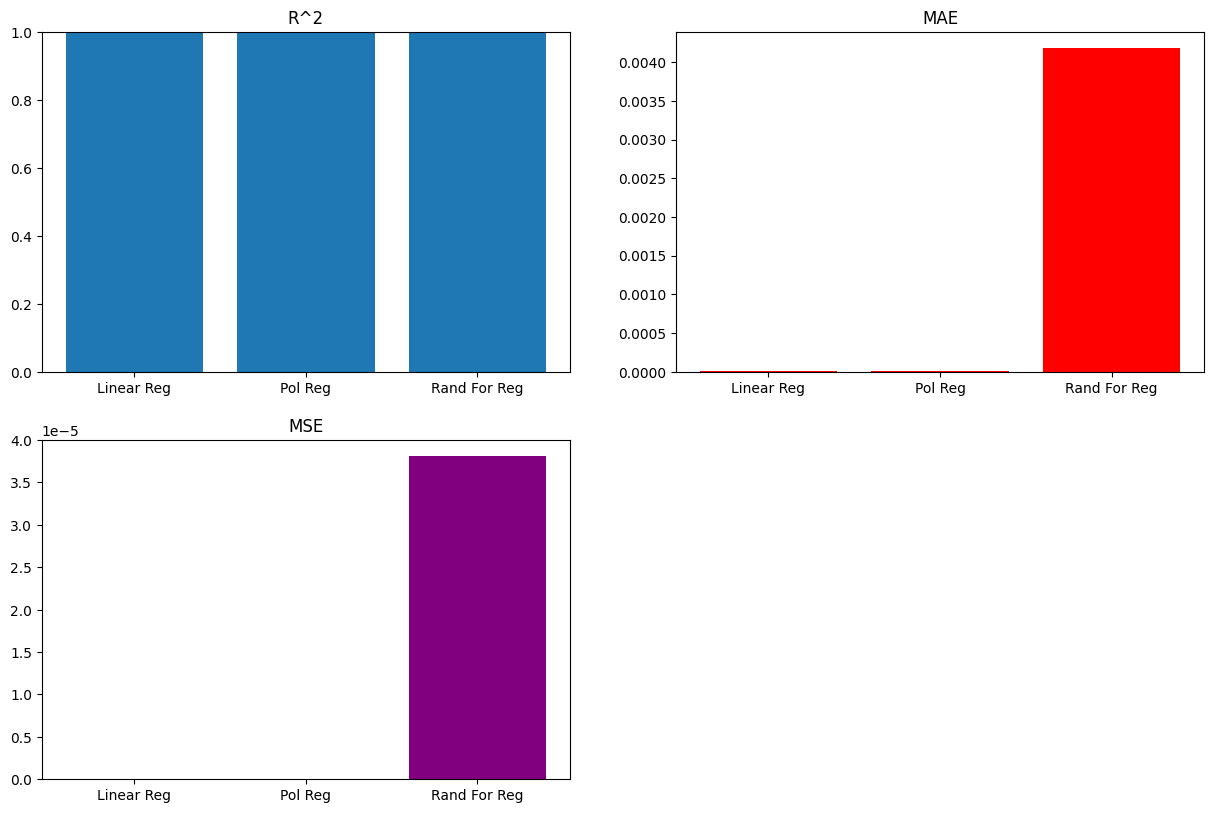

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.bar(result_df['Model'], result_df['R^2'])
plt.title('R^2')
plt.ylim(0,1)

plt.subplot(3,2,2)
plt.bar(result_df['Model'], result_df['MAE'], color='red')
plt.title('MAE')

plt.subplot(3,2,3)
plt.bar(result_df['Model'], result_df['MSE'], color='purple')
plt.title('MSE')

Text(0.5, 1.0, 'MAE')

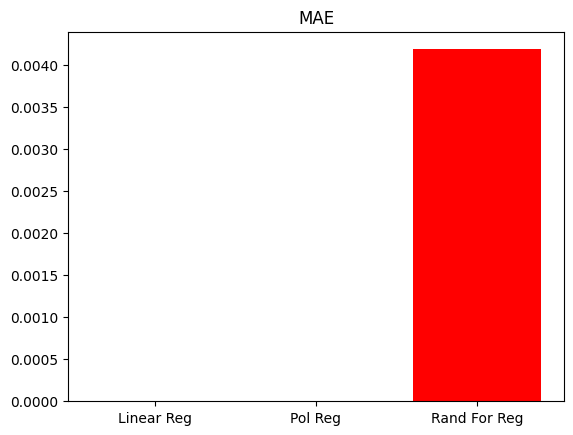

In [27]:
plt.bar(result_df['Model'], result_df['MAE'], color='red')
plt.title('MAE')